In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint, solve_ivp

Let's define a 2-species, 2-plasmid system:

In [3]:
np.random.seed(10)
species = 2
plasmid = 2
kappa = 0.001 * np.ones((species, plasmid))
D = 0.005
mu = 0.3 * np.ones(species)
timespan = np.linspace(0, 1000, 1001)
eta = 0.01*np.abs(np.random.randn(plasmid))
lambda_ = 0.5*np.abs(np.random.randn(species, plasmid))
print(eta)


def two_plasmid_new(y, t):
    pt = np.sum(y[:species])
    dydt = np.zeros(species * (1 + plasmid))
    
    for i in range(species):
        _sum = np.sum([lambda_[i,j]*y[species+plasmid*i+j] for j in range(plasmid)])
        alphai = y[i] / (_sum + y[i])
        dydt[i] = alphai * mu[i] * y[i] * (1 - pt) - D * y[i]
        
        for j in range(plasmid):
            betaij = (1 + lambda_[i,j]) / (1 + lambda_[i,j] + (_sum - lambda_[i,j] * y[species+plasmid*i+j]) / y[i])
            muij = mu[i] / (1 + lambda_[i,j])
            _summ = np.sum([eta[j]*y[species+plasmid*k+j] for k in range(species)])
            dydt[species+plasmid*i+j] = betaij * muij * y[species+plasmid*i+j] * (1 - pt) + (y[i] - y[species+plasmid*i+j]) * _summ - (kappa[i,j] + D) * y[species+plasmid*i+j]
    return dydt

[0.01331587 0.00715279]


In [8]:
initial1 = np.hstack( (0.04*np.ones(species), np.random.uniform(0,0.04,plasmid*species) ) )
timespan = np.linspace(0, 200, 1001)
y1 = odeint(two_plasmid_new, initial1, timespan)

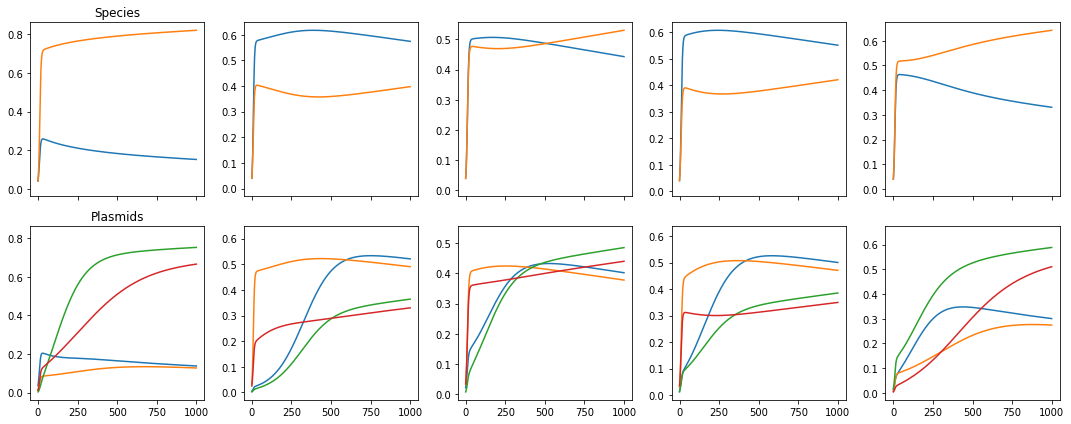

In [10]:
# Number of times to run the simulation
num_simulations = 5

fig, axes = plt.subplots(2, num_simulations, figsize=(3*num_simulations, 6), sharex = True, sharey = "col")
axes = axes.T

for i in range(num_simulations):
    # Initial conditions
    initial1 = np.hstack( (0.04*np.ones(species), np.random.uniform(0,0.04,plasmid*species) ) )
    timespan = np.linspace(0, 1000, 1001)
    y1 = odeint(two_plasmid_new, initial1, timespan)
    
    # Plot the results
    axes[i, 0].plot(timespan, y1[:, 0], label='Column 1')
    axes[i, 0].plot(timespan, y1[:, 1], label='Column 2')
    #axes[i, 0].legend()
    #axes[i, 0].set_title(f'Simulation {i+1} - First two columns')
    
    for j in range(2, y1.shape[1]):
        sub = str(i) + str(j)
        axes[i, 1].plot(timespan, y1[:, j],)
    #axes[i, 1].legend()
    #axes[i, 1].set_title(f'Simulation {i+1} - Remaining columns')

axes[0,0].set_title("Species")
axes[0,1].set_title("Plasmids")
plt.tight_layout()
plt.show()

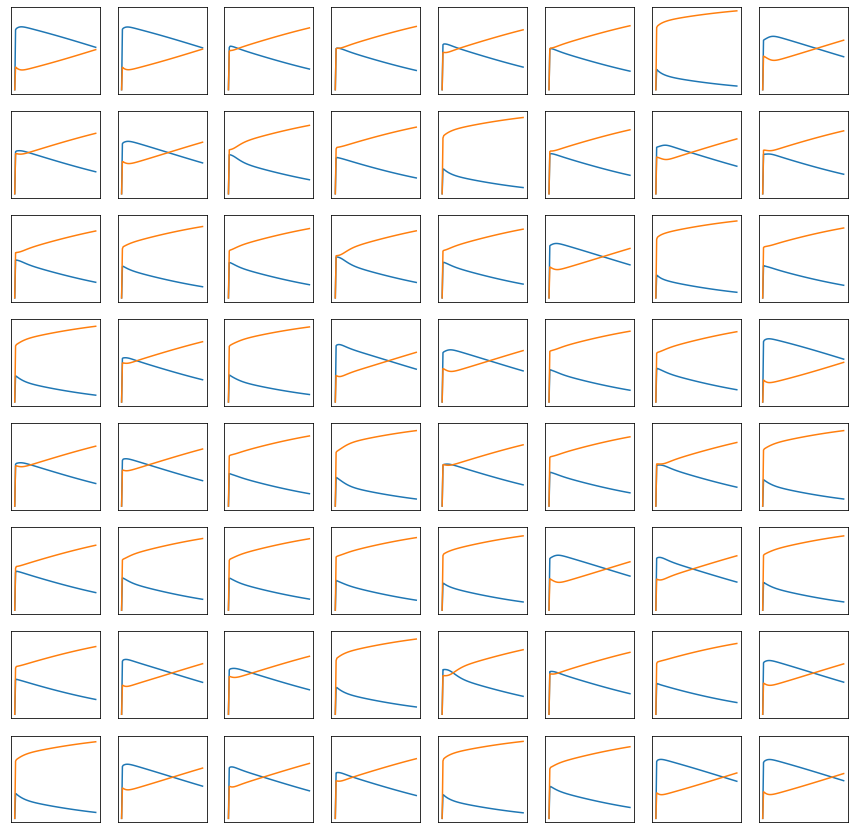

In [18]:
fig, axs = plt.subplots(8,8, figsize = (15,15), sharex = True, sharey = True )

timespan = np.linspace(0, 3000, 101)
sols = []
for ax in axs.flatten():
    initial1 = np.hstack(((0.04*np.ones(species),np.random.uniform(0,0.04,plasmid*species) )))
    y1 = odeint(two_plasmid_new, initial1, timespan)
    ax.plot(y1[:,0:species])
    ax.set_xticks([])
    ax.set_yticks([])
    
    sols.append(y1[:,0:species])
    
plt.show()

In [235]:
from tqdm.notebook import trange 

sols = []
ics = []
for i in trange(5000):
    initial1 = np.hstack(((0.04*np.ones(species),np.random.uniform(0,0.04,plasmid*species))))
    ics.append(initial1[species:])
    y1 = odeint(two_plasmid_new, initial1, timespan)
    sols.append(y1[:,0:species])

  0%|          | 0/5000 [00:00<?, ?it/s]

In [240]:
sols = np.array(sols)

In [244]:
sols = np.swapaxes(sols, 1, 2);
sols.shape

(5000, 2, 101)

In [252]:
ics = np.array(ics)
ics.shape

(5000, 4)

In [254]:
np.save("./data/plasmid_curves.npy", sols)

In [255]:
np.save("./data/ics.npy", ics)